# Data Extraction (with a bit of Preprocessing)

In [82]:
import requests
import nltk
import re
import pandas as pd
import numpy as np
import random
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

In [83]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

we now download the stop words so we can extract the Pure words we can use as data

In [84]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

we fill urls variable with the links of the books txt files, then we fill the book titles and authors as well as labels with the corresponding index in urls

In [85]:
urls = [
    "https://www.gutenberg.org/cache/epub/36/pg36.txt",
    "https://www.gutenberg.org/cache/epub/2591/pg2591.txt",
    "https://www.gutenberg.org/cache/epub/20842/pg20842.txt",
    "https://www.gutenberg.org/cache/epub/174/pg174.txt",
    "https://www.gutenberg.org/cache/epub/219/pg219.txt",
    "https://www.gutenberg.org/cache/epub/17192/pg17192.txt"
]

In [86]:
book_titles = [
    "The War of the Worlds",
    "Grimms’ Fairy Tales",
    "Emma",
    "The Picture of Dorian Gray",
    "Heart of Darkness",
    "The Raven"
]

In [87]:
authors = [
    "H. G. Wells",
    "Jacob Grimm and Wilhelm Grimm",
    "Jane Austen",
    "Oscar Wilde",
    "Joseph Conrad",
    "Edgar Allan Poe"
]

In [88]:
book_labels = [0, 1, 2, 3, 4, 5]

now we start extracting the data from the urls, removing the stop words, lemmatizing it and at last storing them in a pandas DataFrame called data

In [89]:
def preprocess_book(url):
    response = requests.get(url)
    raw_text = response.text
    text = re.findall(r"\b[a-zA-Z]{3,}\b", raw_text)
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in text if word.lower() not in stopwords.words('english')]
    return filtered_words

In [90]:
data = pd.DataFrame(columns=['Author', 'Title', 'Label', '150_Words'])

In [91]:
for i, url in enumerate(urls):
    book_content = preprocess_book(url)
    if book_content is None:
        continue
    book_content = book_content[250:]

    chunks = [" ".join(book_content[j:j + 150]) for j in random.sample(range(len(book_content) - 150), 200)]

    rows = [{'Author': authors[i], 'Title': book_titles[i], 'Label': book_labels[i], '150_Words': chunk} for chunk in chunks]
    temp_df = pd.DataFrame(rows)
    data = pd.concat([data, temp_df], ignore_index=True)

# Most Used Words

In [92]:
from collections import Counter

In [153]:
def plot_most_common_words(words, title, n=10):
    end_index = words.index('END OF THE PROJECT GUTENBERG EBOOK') if 'END OF THE PROJECT GUTENBERG EBOOK' in words else len(words)

    words = words[500:end_index]

    words = [word for word in words if word not in ['gutenberg', 'project']]
    
    counter = Counter(words)
    most_common_words = counter.most_common(n)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'Top {n} words in {title}')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()

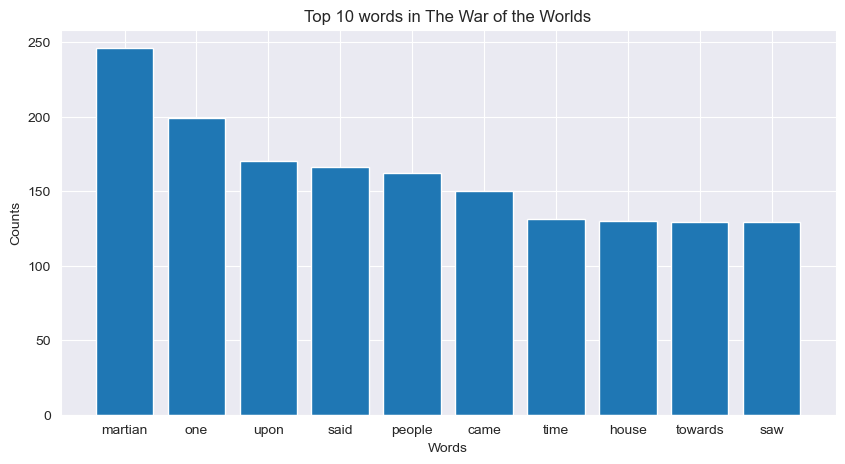

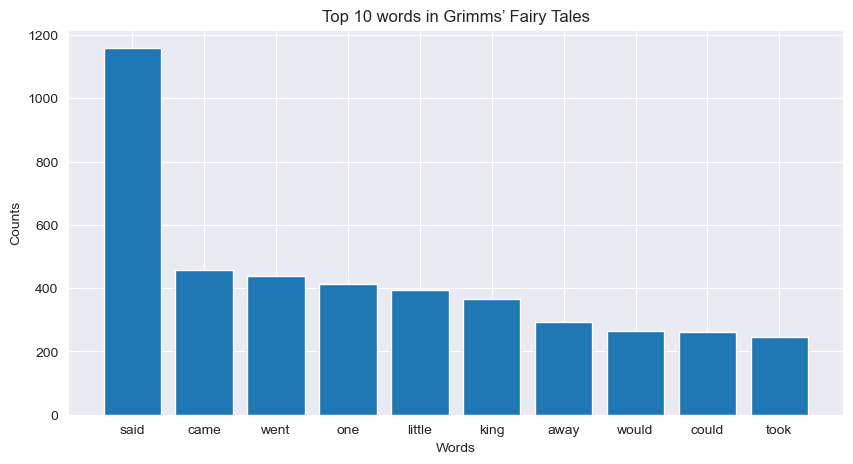

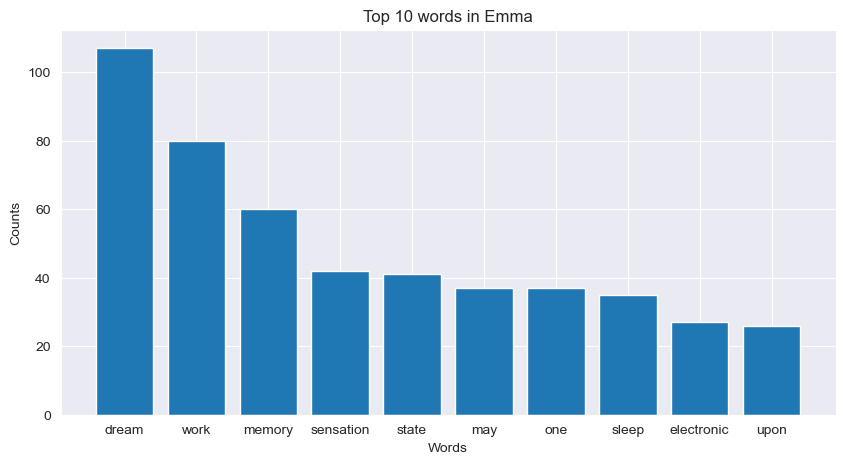

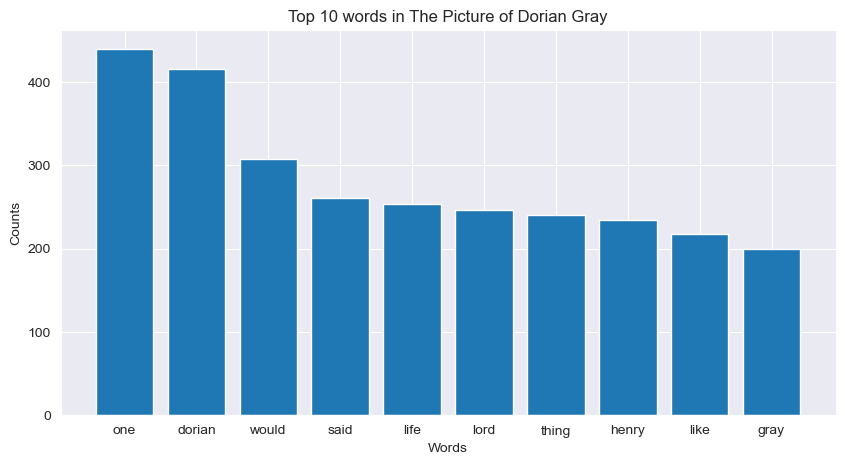

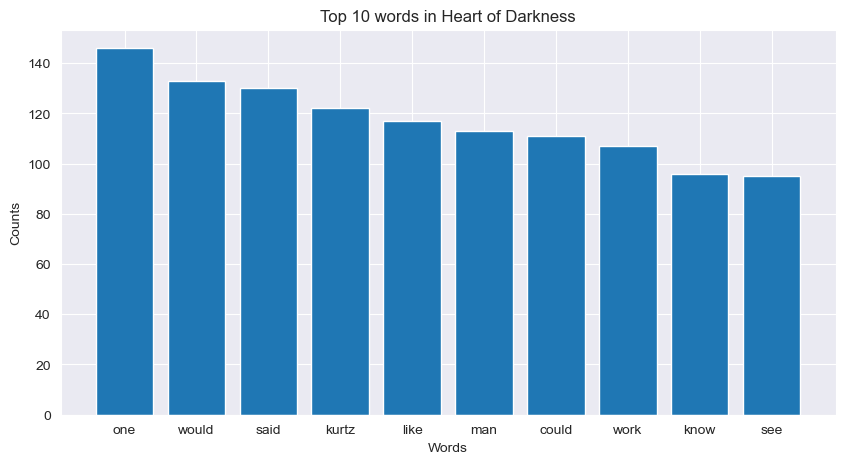

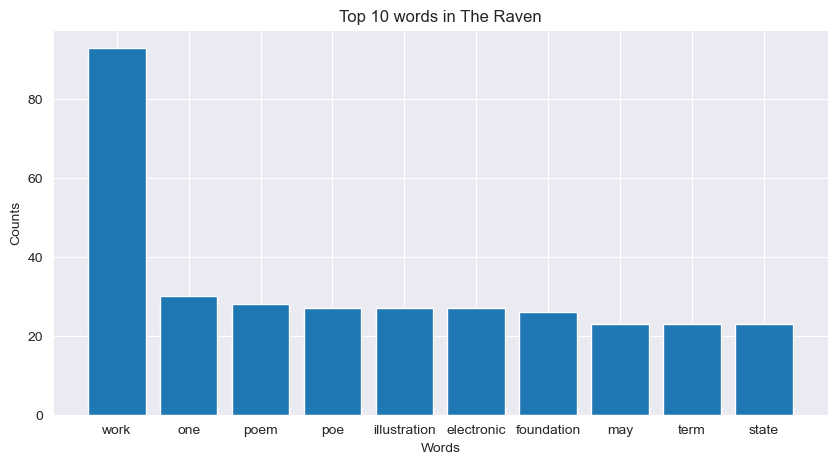

In [154]:
for i, url in enumerate(urls):
    book_content = preprocess_book(url)
    if book_content is None:
        continue
    plot_most_common_words(book_content, book_titles[i])

as you can see, we have a complete dataset here, there are 200 rows for each book, each row contains the title, the author, the label and a random 150 word part of each book 

In [95]:
data

,Author,Title,Label,150_Words
0,H. G. Wells,The War of the Worlds,0,monster already raising case generating heat r...
1,H. G. Wells,The War of the Worlds,0,twilight ventured went shrubbery along passage...
2,H. G. Wells,The War of the Worlds,0,eastward blackened ruin albert terrace splinte...
3,H. G. Wells,The War of the Worlds,0,light everything kitchen leaped clearly visibl...
4,H. G. Wells,The War of the Worlds,0,man killed decided print special edition even ...
...,...,...,...,...
1195,Edgar Allan Poe,The Raven,5,agreement agreement shall interpreted make max...
1196,Edgar Allan Poe,The Raven,5,purpose interval rare almost justify fairfield...
1197,Edgar Allan Poe,The Raven,5,rule set forth general term use part license a...
1198,Edgar Allan Poe,The Raven,5,new york winter finding work upon willis paper...


# Feature Engineering

here we need to use the 150_word column to make new and useable features that we can use for clustering,
here we import the libraries we need and download another part nltk library

In [96]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

here we use the lemmatizer again, but the difference is that we use it on the tokenized data, which has a better effect

In [97]:
lemmatizer = WordNetLemmatizer()

In [98]:
def lemmatize_words(words):
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

In [99]:
data['Words_Tokenized'] = data['150_Words'].apply(word_tokenize)

In [100]:
data['Lemmatized_Words'] = data['Words_Tokenized'].apply(lemmatize_words)

In [101]:
data

,Author,Title,Label,150_Words,Words_Tokenized,Lemmatized_Words
0,H. G. Wells,The War of the Worlds,0,monster already raising case generating heat r...,"[monster, already, raising, case, generating, ...",monster already raising case generating heat r...
1,H. G. Wells,The War of the Worlds,0,twilight ventured went shrubbery along passage...,"[twilight, ventured, went, shrubbery, along, p...",twilight ventured went shrubbery along passage...
2,H. G. Wells,The War of the Worlds,0,eastward blackened ruin albert terrace splinte...,"[eastward, blackened, ruin, albert, terrace, s...",eastward blackened ruin albert terrace splinte...
3,H. G. Wells,The War of the Worlds,0,light everything kitchen leaped clearly visibl...,"[light, everything, kitchen, leaped, clearly, ...",light everything kitchen leaped clearly visibl...
4,H. G. Wells,The War of the Worlds,0,man killed decided print special edition even ...,"[man, killed, decided, print, special, edition...",man killed decided print special edition even ...
...,...,...,...,...,...,...
1195,Edgar Allan Poe,The Raven,5,agreement agreement shall interpreted make max...,"[agreement, agreement, shall, interpreted, mak...",agreement agreement shall interpreted make max...
1196,Edgar Allan Poe,The Raven,5,purpose interval rare almost justify fairfield...,"[purpose, interval, rare, almost, justify, fai...",purpose interval rare almost justify fairfield...
1197,Edgar Allan Poe,The Raven,5,rule set forth general term use part license a...,"[rule, set, forth, general, term, use, part, l...",rule set forth general term use part license a...
1198,Edgar Allan Poe,The Raven,5,new york winter finding work upon willis paper...,"[new, york, winter, finding, work, upon, willi...",new york winter finding work upon willis paper...


now that we have the Lemmatized_Words we can perform different methods for extracting features from a language data
we now import the libraries we need for that
what we will do are
1. TF-IDF(term frequency-inverse document frequency)
2. BoW(Bag-of-Words)
3. word embedding(word2vec)
4. LDA(Latent Dirichlet Allocation)

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from gensim import corpora, models

here we perform the TF-IDF on our lemmatized_words column

In [103]:
lemmatized_words = data['Lemmatized_Words']

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_words)

here we perform BoW on the same column

In [104]:
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(lemmatized_words)

and now the word2vec model on the same column

In [105]:
words = [sentence.split() for sentence in lemmatized_words]
word2vec_model = Word2Vec(words, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(words, total_examples=len(words), epochs=10)

(1750833, 1801640)

now we make each one a DataFrame

In [106]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

word2vec_vectors = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv.key_to_index], axis=0) for words in words]
word2vec_df = pd.DataFrame(word2vec_vectors)
tfidf_df

,abandon,abandoned,abandoning,abandonment,abart,abashed,abbey,abide,abiding,ability,...,youngest,youth,zanzibaris,zeal,zenithward,zimmermann,zither,zodiac,zone,zoological
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.079954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
bow_df

,abandon,abandoned,abandoning,abandonment,abart,abashed,abbey,abide,abiding,ability,...,youngest,youth,zanzibaris,zeal,zenithward,zimmermann,zither,zodiac,zone,zoological
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.107375,0.129335,0.374927,-0.040565,-0.216817,-0.292668,-0.014966,0.175498,0.088511,-0.065525,...,0.107154,0.285920,0.515925,0.076547,0.336389,0.014449,0.161572,0.202198,0.185877,0.058645
1,0.245293,0.015326,0.491242,-0.010325,-0.359123,-0.256140,-0.067314,0.089560,0.145561,-0.106122,...,0.153896,0.430882,0.617889,0.095668,0.268086,-0.080921,0.207554,0.300994,0.254398,0.027812
2,0.135604,0.059400,0.366744,-0.059289,-0.275637,-0.336991,-0.040623,0.125330,0.064203,-0.172565,...,0.136850,0.338129,0.540106,0.075215,0.322443,-0.005532,0.139927,0.139365,0.144367,-0.004939
3,0.165255,-0.016396,0.648353,-0.092291,-0.482114,-0.444196,0.106045,0.179729,-0.005034,-0.283314,...,0.266674,0.408141,0.514324,-0.057453,0.442860,-0.094351,0.138734,0.183361,0.230347,0.044589
4,0.124661,0.090186,0.338449,0.000325,-0.201444,-0.437528,0.027660,0.224145,-0.084207,-0.249585,...,0.113788,0.413087,0.496102,0.142511,0.360469,0.013668,0.138896,0.159009,0.232323,-0.087749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.441094,1.339585,-0.021825,-0.117456,0.844172,-1.381140,-0.319002,1.531314,-0.630913,0.150215,...,0.190531,-0.414218,0.381070,0.005424,1.804147,0.732081,0.276757,0.294746,0.601280,-0.102201
1196,0.031236,0.457946,0.082019,-0.067292,0.061780,-0.321251,0.006967,0.404516,0.292734,0.062591,...,0.031641,0.075884,0.544588,0.106107,0.545109,0.384609,0.150898,-0.031604,0.188684,0.184495
1197,-0.497725,1.499254,0.430507,-0.044727,1.061384,-1.573233,-0.466418,1.511343,-0.499737,0.602494,...,0.272611,-0.461628,0.470646,0.120747,1.601000,0.659547,0.523516,1.052314,0.310250,-0.173393
1198,0.073542,0.386925,0.285282,0.007475,-0.133231,-0.338735,0.053087,0.426210,-0.003249,-0.016161,...,0.145938,0.306299,0.446284,0.120482,0.628351,0.327050,-0.006387,0.166820,0.233213,0.150509


here we do the LDA method on the same column to be able to get the most important topics and make it a categorical feature

In [109]:
lemmatized_words = [doc.split() for doc in data['Lemmatized_Words']]

dictionary = corpora.Dictionary(lemmatized_words)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in lemmatized_words]

LDA = models.LdaModel
num_topics = 5
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=42)

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.012*"said" + 0.008*"would" + 0.007*"one" + 0.005*"could" + 0.004*"little" + 0.004*"man" + 0.004*"know" + 0.004*"time" + 0.004*"went" + 0.004*"must"

Topic: 1 
Words: 0.010*"one" + 0.010*"said" + 0.005*"upon" + 0.004*"man" + 0.004*"would" + 0.004*"like" + 0.004*"came" + 0.004*"still" + 0.004*"memory" + 0.004*"time"

Topic: 2 
Words: 0.009*"one" + 0.006*"said" + 0.006*"dream" + 0.005*"life" + 0.005*"little" + 0.004*"would" + 0.004*"came" + 0.004*"like" + 0.004*"man" + 0.004*"upon"

Topic: 3 
Words: 0.020*"gutenberg" + 0.020*"work" + 0.019*"project" + 0.007*"electronic" + 0.007*"one" + 0.006*"term" + 0.006*"license" + 0.006*"may" + 0.005*"copyright" + 0.005*"must"

Topic: 4 
Words: 0.007*"gutenberg" + 0.006*"work" + 0.006*"project" + 0.005*"one" + 0.004*"would" + 0.004*"said" + 0.004*"dream" + 0.004*"upon" + 0.004*"could" + 0.003*"foundation"


here we add the LDA results to our DataFrame

In [110]:
dominant_topics = [sorted(lda_model[doc], key=lambda x: x[1], reverse=True)[0][0] for doc in doc_term_matrix]

dominant_topics_df = pd.DataFrame(dominant_topics, columns=['Dominant_Topic'])

data = pd.concat([data, dominant_topics_df], axis=1)

dominant_topics_df

,Dominant_Topic
0,2
1,1
2,4
3,2
4,2
...,...
1195,3
1196,0
1197,3
1198,2


there are some extra columns that cant be used in the clustering models, we need to remove all of them to be able to use those methods, we also set the index as the title so we can understand the results better

In [111]:
data.drop('150_Words', axis=1, inplace=True)
data.drop('Lemmatized_Words', axis=1, inplace=True)
data.drop('Words_Tokenized', axis=1, inplace=True)

In [112]:
data.rename(index=data.Title)

,Author,Title,Label,Dominant_Topic
The War of the Worlds,H. G. Wells,The War of the Worlds,0,2
The War of the Worlds,H. G. Wells,The War of the Worlds,0,1
The War of the Worlds,H. G. Wells,The War of the Worlds,0,4
The War of the Worlds,H. G. Wells,The War of the Worlds,0,2
The War of the Worlds,H. G. Wells,The War of the Worlds,0,2
...,...,...,...,...
The Raven,Edgar Allan Poe,The Raven,5,3
The Raven,Edgar Allan Poe,The Raven,5,0
The Raven,Edgar Allan Poe,The Raven,5,3
The Raven,Edgar Allan Poe,The Raven,5,2


In [113]:
data.drop('Author', axis=1, inplace=True)
data.drop('Title', axis=1, inplace=True)

# K-Means

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [115]:
y = data['Label']

In [116]:
def perform_kmeans(df, y, n_clusters=6, test_size=0.3, random_state=42):
    
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=test_size, random_state=random_state)
    
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    x_train.columns = x_train.columns.astype(str)
    x_test.columns = x_test.columns.astype(str)
    
    kmn = KMeans(n_clusters=n_clusters)
    kmn.fit(x_train)
    
    labels_kmeans_train = kmn.predict(x_train).astype(int)
    labels_kmeans_test = kmn.predict(x_test).astype(int)
    center = kmn.cluster_centers_
    
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    
    plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=labels_kmeans_train)
    plt.scatter(center[:,0], center[:,2], marker='x', s=150)
    plt.show()
    
    kappa_kmeans_train = cohen_kappa_score(labels_kmeans_train, y_train)
    silhouette_kmeans_train = silhouette_score(x_train, labels_kmeans_train)
    inertia_kmeans_train = kmn.inertia_
    davies_bouldin_kmeans_train = davies_bouldin_score(x_train, labels_kmeans_train)
    calinski_harabasz_kmeans_train = calinski_harabasz_score(x_train, labels_kmeans_train)
    
    plt.scatter(x_test.iloc[:,0], x_test.iloc[:,1], c=labels_kmeans_test)
    plt.scatter(center[:,0], center[:,2], marker='x', s=150)
    plt.show()
    
    kappa_kmeans_test = cohen_kappa_score(labels_kmeans_test, y_test)
    silhouette_kmeans_test = silhouette_score(x_test, labels_kmeans_test)
    inertia_kmeans_test = kmn.inertia_
    davies_bouldin_kmeans_test = davies_bouldin_score(x_test, labels_kmeans_test)
    calinski_harabasz_kmeans_test = calinski_harabasz_score(x_test, labels_kmeans_test)

    return {
        "train": {
            "kappa": kappa_kmeans_train,
            "silhouette": silhouette_kmeans_train,
            "inertia": inertia_kmeans_train,
            "davies_bouldin": davies_bouldin_kmeans_train,
            "calinski_harabasz": calinski_harabasz_kmeans_train
        },
        "test": {
            "kappa": kappa_kmeans_test,
            "silhouette": silhouette_kmeans_test,
            "inertia": inertia_kmeans_test,
            "davies_bouldin": davies_bouldin_kmeans_test,
            "calinski_harabasz": calinski_harabasz_kmeans_test
        }
    }

Kmeans and TF-IDF

E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


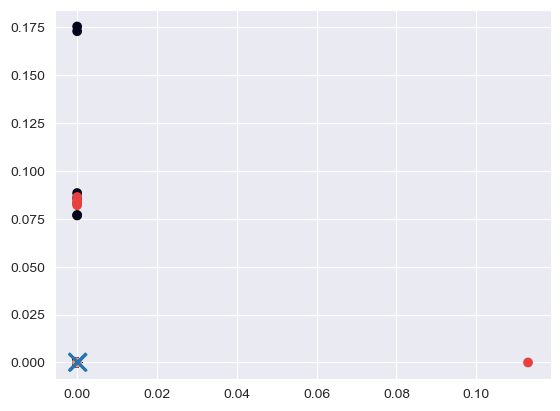

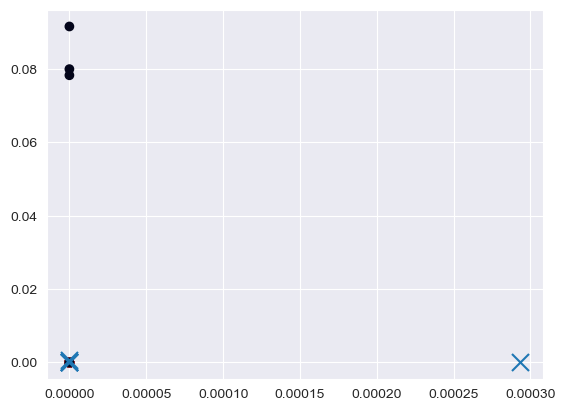

{'train': {'kappa': 0.23181722195352883,
  'silhouette': 0.05758768225344156,
  'inertia': 726.2355610806806,
  'davies_bouldin': 5.3655085547791295,
  'calinski_harabasz': 18.07875126946882},
 'test': {'kappa': 0.2121447171588453,
  'silhouette': 0.05172144131486987,
  'inertia': 726.2355610806806,
  'davies_bouldin': 4.826500770686466,
  'calinski_harabasz': 7.524521922339431}}

In [117]:
perform_kmeans(tfidf_df, y)

Kmeans and Bow

E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


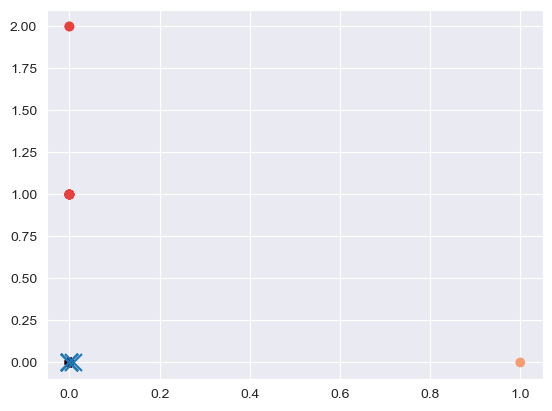

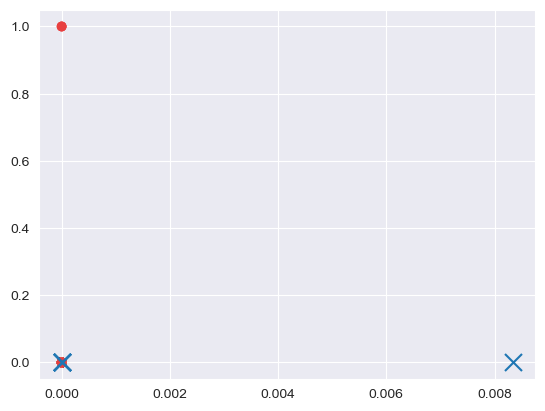

{'train': {'kappa': -0.08269878895263627,
  'silhouette': 0.04687302788546429,
  'inertia': 165845.71750509337,
  'davies_bouldin': 3.6530541143942052,
  'calinski_harabasz': 39.71046480046142},
 'test': {'kappa': -0.10372167985031777,
  'silhouette': 0.03305828396074246,
  'inertia': 165845.71750509337,
  'davies_bouldin': 3.469220057804167,
  'calinski_harabasz': 15.238320385606274}}

In [118]:
perform_kmeans(bow_df, y)

Kmeans and Word2Vec

E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


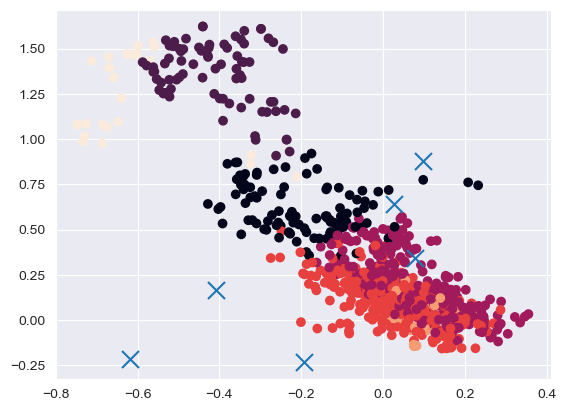

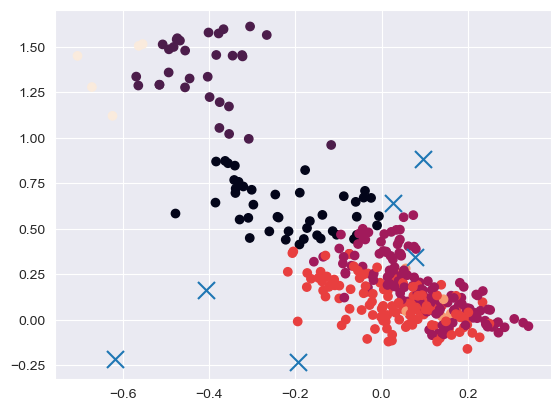

{'train': {'kappa': -0.021313116864540183,
  'silhouette': 0.30401775,
  'inertia': 1106.5186767578125,
  'davies_bouldin': 1.1239962454858226,
  'calinski_harabasz': 736.7765861256968},
 'test': {'kappa': -0.0366405168435624,
  'silhouette': 0.30484843,
  'inertia': 1106.5186767578125,
  'davies_bouldin': 1.0362080759449037,
  'calinski_harabasz': 309.71841953759554}}

In [119]:
perform_kmeans(word2vec_df, y)

# GMM(EM)

Expectation-Maximization (EM) clustering is a probabilistic approach to data partitioning. It’s an iterative method used to find maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables.
The EM algorithm alternates between two steps:
Expectation (E) step: This step creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters.
Maximization (M) step: This step computes parameters maximizing the expected log-likelihood found on the E step.

In [120]:
from sklearn.mixture import GaussianMixture

In [121]:
def apply_gmm_and_metrics(data, y, n_components=6, test_size=0.3, random_state=42):

    x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=random_state)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    x_train.columns = x_train.columns.astype(str)
    x_test.columns = x_test.columns.astype(str)

    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(x_train)

    labels_em_train = gmm.predict(x_train)
    labels_em_test = gmm.predict(x_test)


    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=labels_em_train)
    plt.show()

    #kappa_gmm_train = cohen_kappa_score(labels_em_train, y_train)
    silhouette_gmm_train = silhouette_score(x_train, labels_em_train)
    davies_bouldin_gmm_train = davies_bouldin_score(x_train, labels_em_train)
    calinski_harabasz_gmm_train = calinski_harabasz_score(x_train, labels_em_train)

    #print(f"Cohen's Kappa for train data: {kappa_gmm_train}")
    print(f"Silhouette Score train: {silhouette_gmm_train}")
    print(f"Davies-Bouldin Index train: {davies_bouldin_gmm_train}")
    print(f"Calinski-Harabasz Index train: {calinski_harabasz_gmm_train}")

    plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=labels_em_test)
    plt.show()

    #kappa_gmm_test = cohen_kappa_score(labels_em_test, y_test)
    silhouette_gmm_test = silhouette_score(x_test, labels_em_test)
    davies_bouldin_gmm_test = davies_bouldin_score(x_test, labels_em_test)
    calinski_harabasz_gmm_test = calinski_harabasz_score(x_test, labels_em_test)

    #print(f"Cohen's Kappa for test data: {kappa_gmm_test}")
    print(f"Silhouette Score test: {silhouette_gmm_test}")
    print(f"Davies-Bouldin Index test: {davies_bouldin_gmm_test}")
    print(f"Calinski-Harabasz Index test: {calinski_harabasz_gmm_test}")


    return labels_em_train, labels_em_test

GMM and TF-IDF

E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


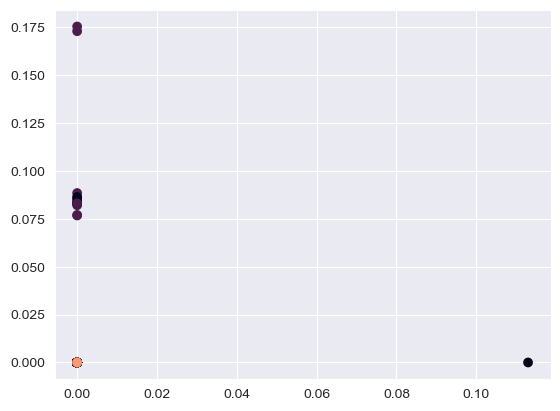

Silhouette Score train: 0.05737127246239358
Davies-Bouldin Index train: 5.496880319394937
Calinski-Harabasz Index train: 17.995994563833268


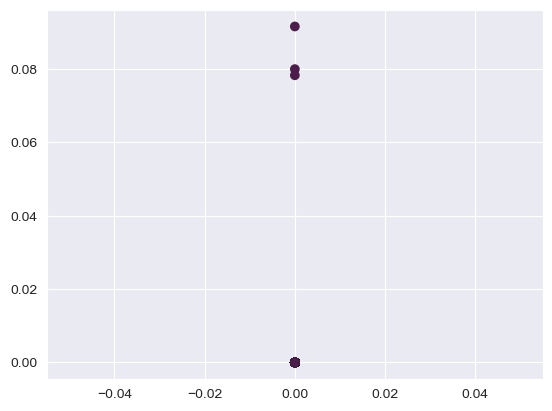

Silhouette Score test: 0.05059224141605011
Davies-Bouldin Index test: 4.991774754928966
Calinski-Harabasz Index test: 7.368888394625462


(array([5, 0, 1, 0, 5, 3, 1, 0, 2, 0, 5, 2, 4, 5, 2, 5, 1, 0, 0, 0, 0, 4,
        5, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 5, 2, 2, 2, 0, 5, 5, 5, 2, 2,
        5, 1, 0, 0, 0, 0, 2, 5, 0, 0, 5, 0, 0, 0, 5, 5, 1, 1, 3, 0, 5, 1,
        0, 1, 0, 1, 2, 1, 0, 0, 5, 0, 0, 0, 0, 1, 2, 4, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 5, 2, 4, 0, 0, 1, 3, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 4,
        0, 0, 4, 0, 0, 5, 1, 1, 5, 1, 0, 5, 2, 5, 0, 0, 5, 1, 5, 0, 0, 1,
        1, 5, 1, 5, 3, 0, 4, 2, 0, 5, 2, 3, 2, 0, 1, 2, 5, 1, 0, 0, 5, 2,
        2, 4, 1, 5, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0,
        5, 4, 1, 5, 4, 5, 1, 3, 4, 5, 4, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 3,
        2, 5, 1, 0, 4, 3, 5, 2, 1, 0, 2, 0, 1, 1, 5, 0, 5, 1, 0, 5, 1, 2,
        1, 5, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 5, 1, 1, 2, 1, 2, 0, 2, 1, 0,
        1, 1, 0, 3, 0, 1, 5, 0, 0, 5, 0, 0, 1, 1, 5, 1, 5, 1, 4, 1, 5, 0,
        2, 5, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 1, 2, 0, 5, 0, 3, 2, 5, 2,
        1, 0, 0, 0, 0, 0, 0, 3, 0, 5, 

In [122]:
apply_gmm_and_metrics(tfidf_df, y)

GMM and BoW

E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


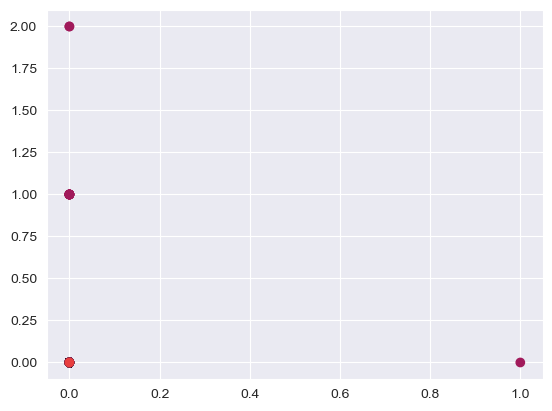

Silhouette Score train: 0.041926336353476694
Davies-Bouldin Index train: 4.310285647201886
Calinski-Harabasz Index train: 37.54840166960493


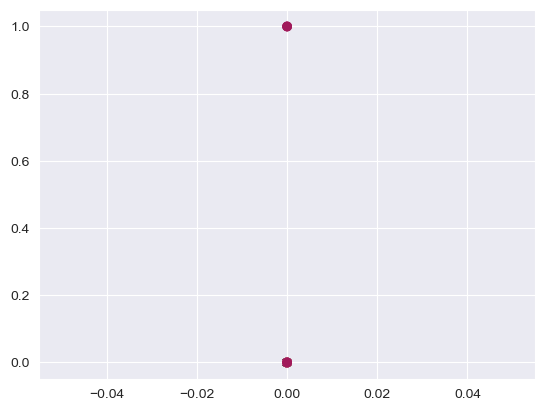

Silhouette Score test: 0.026329432406820903
Davies-Bouldin Index test: 4.05291975247536
Calinski-Harabasz Index test: 15.495061340920222


(array([4, 5, 2, 2, 0, 0, 2, 5, 4, 5, 4, 1, 3, 4, 1, 4, 0, 5, 2, 5, 2, 3,
        4, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 4, 1, 1, 1, 2, 4, 4, 0, 1, 1,
        4, 2, 2, 5, 2, 5, 1, 4, 5, 5, 4, 5, 5, 2, 4, 4, 2, 2, 0, 2, 4, 2,
        5, 2, 5, 2, 1, 2, 5, 5, 4, 5, 5, 5, 2, 2, 1, 3, 2, 2, 2, 5, 2, 5,
        2, 2, 5, 2, 4, 1, 3, 5, 5, 2, 0, 5, 4, 5, 5, 5, 2, 2, 2, 5, 1, 3,
        5, 4, 3, 5, 5, 4, 2, 2, 4, 2, 2, 4, 0, 4, 5, 5, 4, 2, 4, 5, 2, 2,
        2, 4, 2, 4, 0, 5, 0, 1, 5, 4, 1, 0, 1, 5, 2, 4, 4, 2, 5, 5, 4, 1,
        1, 3, 2, 4, 5, 2, 5, 0, 5, 5, 2, 1, 5, 2, 4, 5, 0, 2, 2, 5, 5, 2,
        4, 3, 5, 4, 0, 4, 2, 0, 3, 4, 3, 2, 4, 2, 5, 5, 5, 2, 5, 2, 2, 0,
        1, 4, 2, 2, 3, 0, 4, 1, 2, 5, 1, 5, 2, 2, 4, 2, 4, 2, 2, 4, 2, 1,
        2, 4, 2, 5, 5, 2, 5, 0, 2, 2, 2, 2, 4, 2, 2, 4, 2, 1, 5, 1, 2, 5,
        2, 2, 5, 0, 5, 0, 4, 5, 2, 4, 5, 5, 2, 2, 4, 2, 0, 2, 3, 2, 4, 2,
        1, 4, 2, 2, 2, 5, 5, 2, 2, 0, 5, 2, 2, 2, 1, 5, 4, 5, 0, 0, 4, 0,
        2, 5, 5, 2, 2, 5, 2, 0, 5, 4, 

In [123]:
apply_gmm_and_metrics(bow_df, y)

GMM and Word2Vec

E:\apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


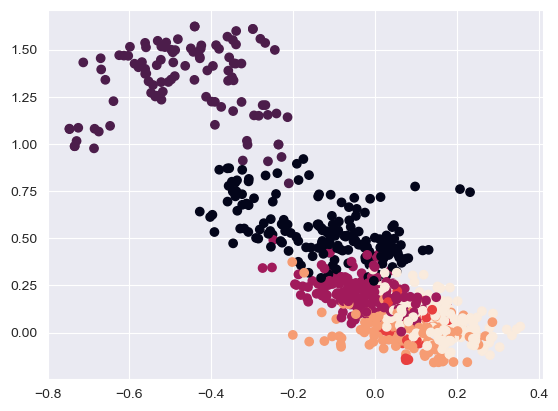

Silhouette Score train: 0.2922888398170471
Davies-Bouldin Index train: 1.062923822076754
Calinski-Harabasz Index train: 680.8012652299446


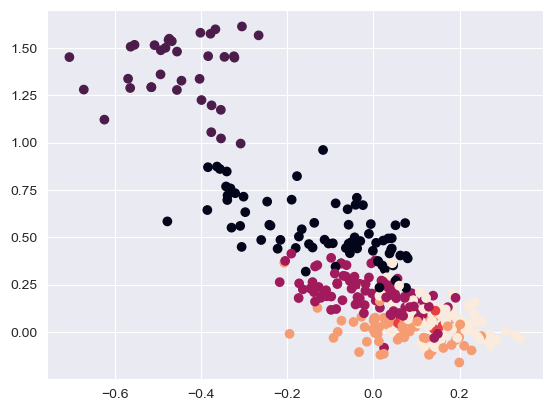

Silhouette Score test: 0.24742427468299866
Davies-Bouldin Index test: 1.1079419558493562
Calinski-Harabasz Index test: 280.15556934976826


(array([0, 4, 5, 2, 0, 0, 0, 2, 1, 4, 0, 1, 3, 0, 1, 0, 0, 4, 2, 4, 5, 3,
        0, 2, 5, 5, 5, 5, 5, 5, 0, 4, 5, 4, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1,
        0, 5, 5, 4, 5, 2, 1, 0, 2, 4, 0, 2, 4, 2, 0, 0, 5, 5, 0, 2, 0, 5,
        2, 5, 2, 5, 1, 5, 4, 4, 0, 4, 4, 4, 2, 5, 1, 3, 5, 2, 2, 2, 5, 2,
        2, 5, 2, 2, 0, 1, 3, 4, 4, 5, 0, 4, 0, 4, 4, 4, 2, 0, 5, 4, 1, 3,
        2, 2, 3, 4, 2, 0, 5, 5, 0, 5, 2, 0, 1, 0, 4, 4, 0, 5, 0, 2, 5, 5,
        5, 0, 5, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 4, 5, 1, 0, 5, 4, 2, 0, 1,
        1, 3, 5, 0, 4, 5, 4, 0, 4, 4, 5, 1, 2, 5, 2, 4, 0, 5, 0, 2, 2, 2,
        0, 3, 2, 0, 5, 0, 5, 0, 3, 0, 3, 5, 0, 5, 4, 4, 2, 2, 4, 5, 2, 0,
        1, 0, 2, 5, 3, 0, 0, 1, 5, 4, 1, 4, 5, 5, 0, 0, 0, 5, 2, 0, 5, 1,
        5, 0, 5, 4, 4, 5, 4, 0, 0, 5, 2, 5, 0, 5, 5, 1, 0, 1, 2, 1, 5, 4,
        2, 5, 4, 0, 4, 0, 0, 2, 2, 0, 4, 2, 5, 5, 0, 5, 0, 5, 3, 5, 0, 5,
        1, 0, 2, 2, 0, 4, 4, 2, 5, 0, 2, 2, 5, 5, 1, 2, 0, 2, 0, 1, 0, 1,
        5, 2, 2, 5, 5, 4, 5, 0, 4, 0, 

In [124]:
apply_gmm_and_metrics(word2vec_df, y)

# Hierarchy

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [126]:
def apply_hierarchical_and_metrics(data, y, n_clusters=6, test_size=0.3, random_state=42):
    
    x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=random_state)

    methods = ['single', 'complete', 'average', 'ward']
    linkage_matrices = {method: linkage(x_train, method=method) for method in methods}

    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods):
        plt.subplot(2, 2, i + 1)
        dendrogram(linkage_matrices[method])
        plt.title(f"Dendrogram ({method.capitalize()})")
    plt.tight_layout()
    plt.show()

    silhouette_scores = {}
    for method in methods:
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        labels = agg_clustering.fit_predict(x_train)
        silhouette_scores[method] = silhouette_score(x_train, labels)
    print("Silhouette Scores for different linkage methods:")
    for method, score in silhouette_scores.items():
        print(f"{method.capitalize()}: {score:}")

    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels_hierarchy_train = agg_clustering.fit_predict(x_train)
    labels_hierarchy_test = agg_clustering.fit_predict(x_test)

    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=labels_hierarchy_train)
    plt.show()

    #kappa_hierachy_train = cohen_kappa_score(labels_hierarchy_train, y_train)
    silhouette_hierachy_train = silhouette_score(x_train, labels_hierarchy_train)
    davies_bouldin_hierachy_train = davies_bouldin_score(x_train, labels_hierarchy_train)
    calinski_harabasz_hierachy_train = calinski_harabasz_score(x_train, labels_hierarchy_train)

    #print(f"Cohen's Kappa for train data: {kappa_hierachy_train}")
    print(f"Silhouette Score train: {silhouette_hierachy_train}")
    print(f"Davies-Bouldin Index train: {davies_bouldin_hierachy_train}")
    print(f"Calinski-Harabasz Index train: {calinski_harabasz_hierachy_train}")

    plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=labels_hierarchy_test)
    plt.show()

    #kappa_hierarchy_test = cohen_kappa_score(labels_hierarchy_test, y_test)
    silhouette_hierarchy_test = silhouette_score(x_test, labels_hierarchy_test)
    davies_bouldin_hierarchy_test = davies_bouldin_score(x_test, labels_hierarchy_test)
    calinski_harabasz_hierarchy_test = calinski_harabasz_score(x_test, labels_hierarchy_test)

    #print(f"Cohen's Kappa for test data: {kappa_hierarchy_test}")
    print(f"Silhouette Score test: {silhouette_hierarchy_test}")
    print(f"Davies-Bouldin Index test: {davies_bouldin_hierarchy_test}")
    print(f"Calinski-Harabasz Index test: {calinski_harabasz_hierarchy_test}")

    return labels_hierarchy_train, labels_hierarchy_test

hierarchy and TF-IDF

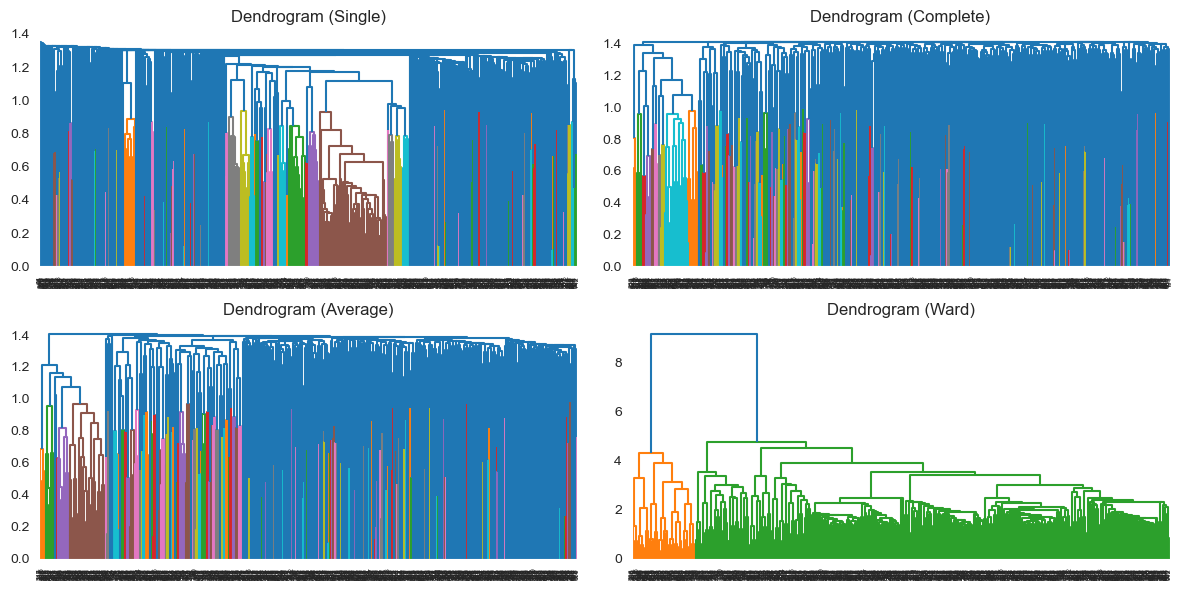

Silhouette Scores for different linkage methods:
Single: 0.000590735734168433
Complete: 0.051191350117814255
Average: 0.05173443388723318
Ward: 0.04572005089580752


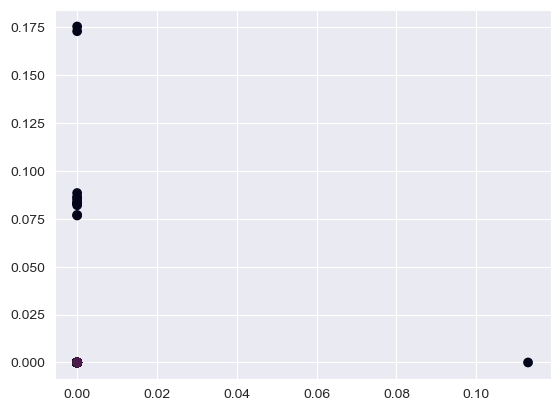

Silhouette Score train: 0.05173443388723318
Davies-Bouldin Index train: 4.057369528408512
Calinski-Harabasz Index train: 15.418886677380993


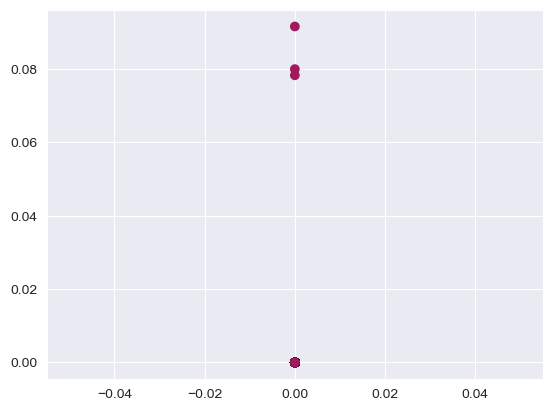

Silhouette Score train: 0.049200644094823824
Davies-Bouldin Index test: 4.841071370191649
Calinski-Harabasz Index test: 7.063371456241163


(array([4, 0, 0, 0, 1, 1, 0, 0, 3, 0, 4, 3, 1, 4, 3, 4, 1, 0, 0, 0, 0, 1,
        4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 3, 0, 4, 4, 1, 3, 3,
        4, 0, 0, 0, 5, 0, 3, 4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 1, 0, 4, 0,
        0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 3, 1,
        0, 0, 1, 0, 0, 4, 0, 0, 4, 0, 0, 4, 3, 4, 0, 0, 4, 0, 4, 0, 0, 0,
        0, 4, 0, 4, 1, 0, 1, 3, 0, 4, 3, 1, 3, 0, 0, 3, 4, 0, 0, 0, 4, 3,
        3, 1, 0, 4, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0,
        4, 1, 0, 4, 1, 4, 0, 1, 1, 4, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        3, 4, 0, 5, 1, 1, 4, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 3,
        0, 4, 5, 0, 0, 0, 0, 1, 4, 0, 0, 0, 4, 0, 0, 3, 0, 3, 0, 3, 0, 0,
        0, 0, 0, 1, 0, 1, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0,
        3, 4, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 4, 0, 1, 3, 4, 3,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 

In [127]:
apply_hierarchical_and_metrics(tfidf_df, y)

hierarchy and BoW

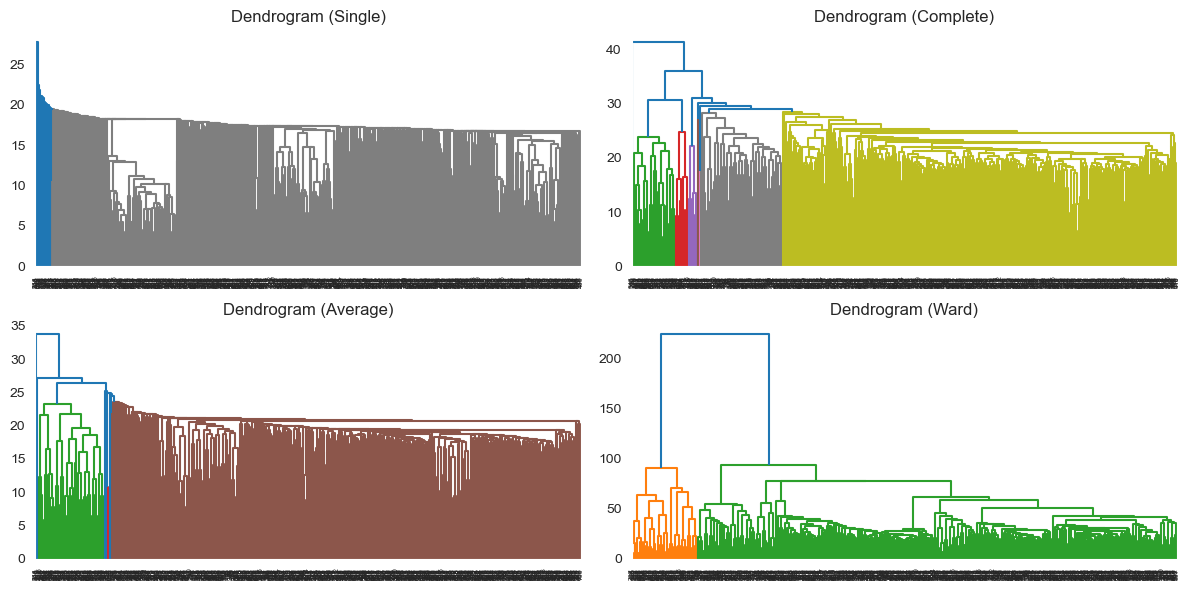

Silhouette Scores for different linkage methods:
Single: 0.10696719977666683
Complete: 0.1203941830700473
Average: 0.18041936125213628
Ward: 0.06713140899450741


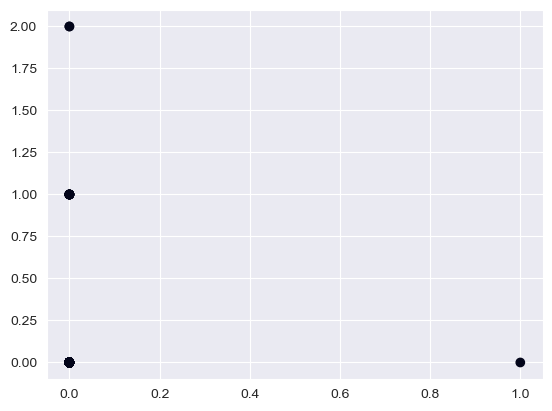

Silhouette Score train: 0.18041936125213628
Davies-Bouldin Index train: 1.0433700949283105
Calinski-Harabasz Index train: 26.527460963937845


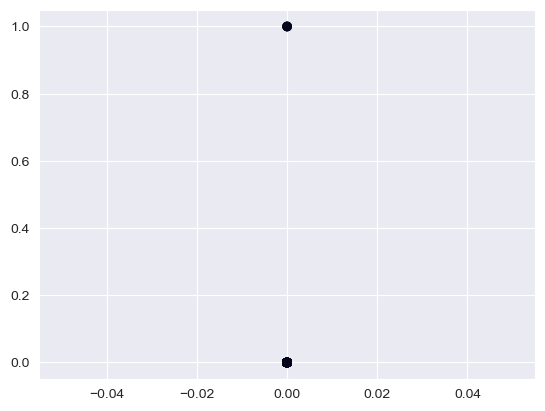

Silhouette Score train: 0.17918283074079247
Davies-Bouldin Index test: 0.9440408727928218
Calinski-Harabasz Index test: 12.155621821680247


(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [128]:
apply_hierarchical_and_metrics(bow_df, y)

Hierarchy and Word2vec

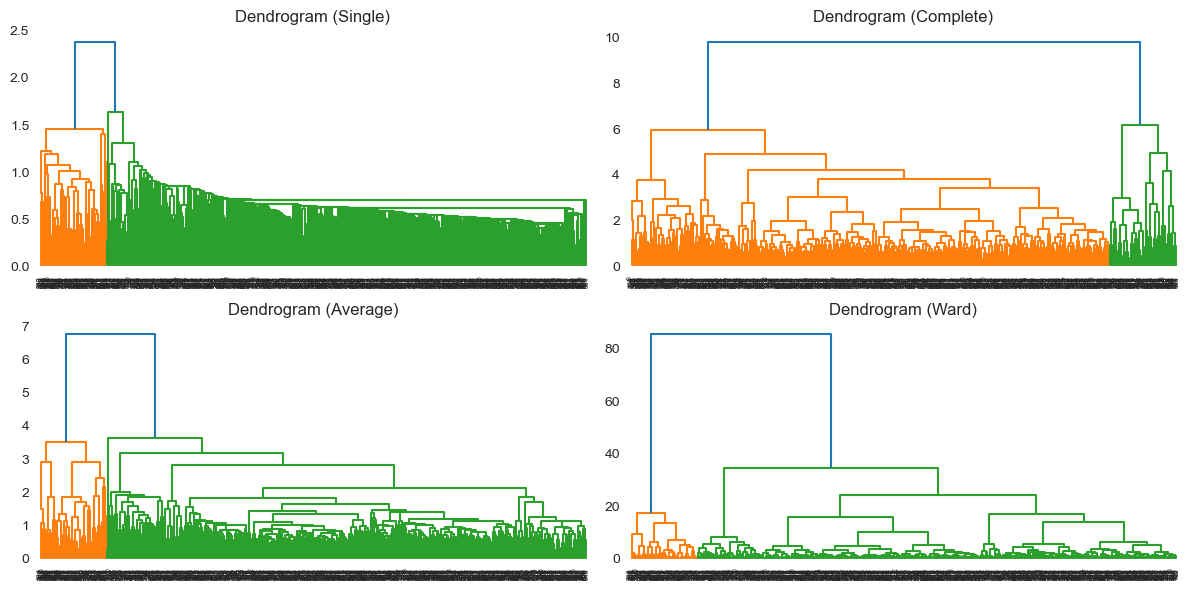

Silhouette Scores for different linkage methods:
Single: 0.28027886152267456
Complete: 0.1865449845790863
Average: 0.3682989180088043
Ward: 0.28720295429229736


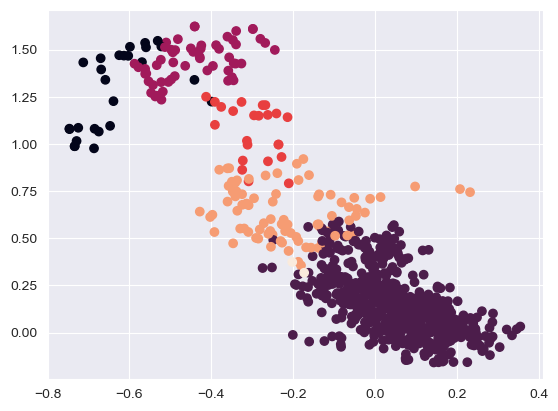

Silhouette Score train: 0.3682989180088043
Davies-Bouldin Index train: 0.9087702526845679
Calinski-Harabasz Index train: 494.83762247989847


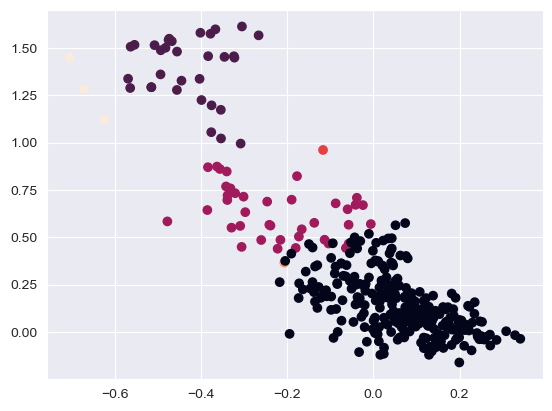

Silhouette Score train: 0.3702802062034607
Davies-Bouldin Index test: 0.651496623329555
Calinski-Harabasz Index test: 202.15051518198297


(array([4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 3, 1, 4, 0, 4, 1, 1, 1, 1, 1, 1,
        4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 3, 1, 1, 4, 1, 2, 0,
        4, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 3, 4, 1, 1, 1, 1, 4, 1, 1, 1,
        1, 4, 1, 4, 1, 1, 1, 2, 1, 4, 2, 1, 2, 1, 1, 0, 4, 1, 1, 1, 1, 0,
        0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 4, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 2,
        1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 3, 4, 3,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 

In [129]:
apply_hierarchical_and_metrics(word2vec_df, y)

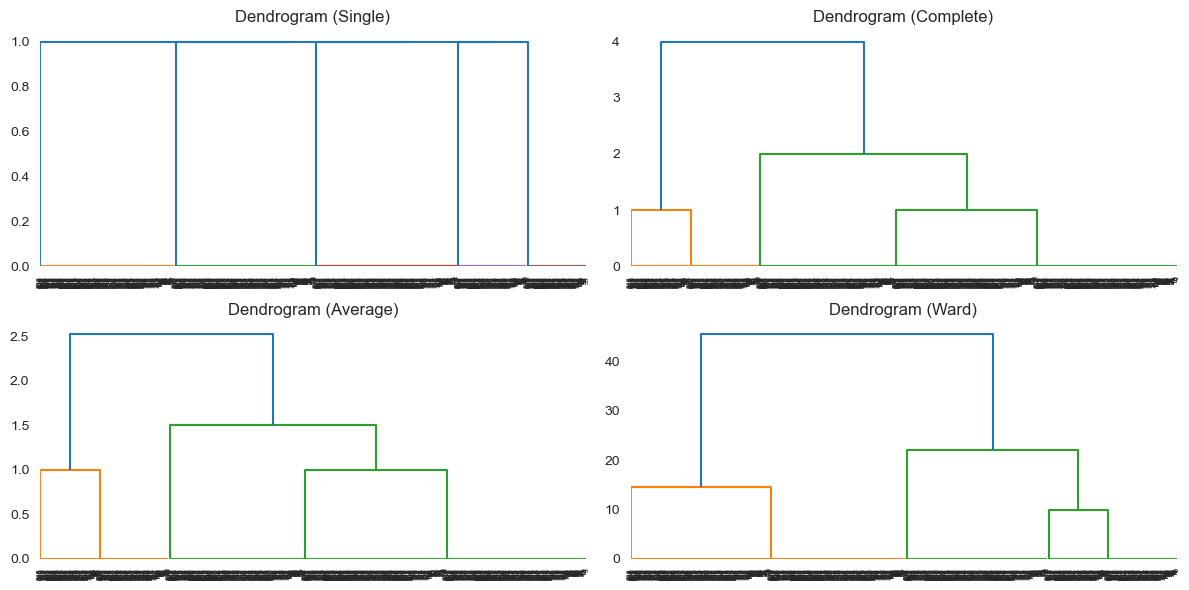

Silhouette Scores for different linkage methods:
Single: 0.7523809523809524
Complete: 0.7523809523809524
Average: 0.7523809523809524
Ward: 0.7523809523809524


IndexError: single positional indexer is out-of-bounds

In [130]:
apply_hierarchical_and_metrics(dominant_topics_df, y)

# Best Result

from what we saw in the last part we can see that we got the best trsults using hierarchy on the dominant topic Dataframe
we will perform it again on the dominant topics dataframe without splitting it

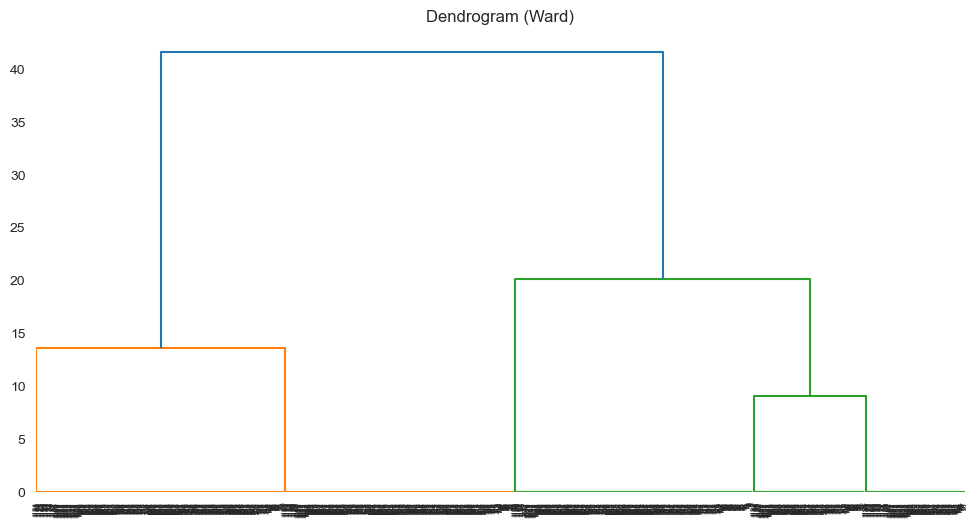

Silhouette Score (Ward): 0.8916666666666667
Davies-Bouldin Index (Ward): 0.0
Calinski-Harabasz Index (Ward): 9.445813787339643e+33


In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dominant_topics_df)

agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
labels_hierarchy = agg_clustering.fit_predict(X_scaled)

linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Ward)")
plt.show()

silhouette_score_ward = silhouette_score(X_scaled, labels_hierarchy)
davies_bouldin_score_ward = davies_bouldin_score(X_scaled, labels_hierarchy)
calinski_harabasz_score_ward = calinski_harabasz_score(X_scaled, labels_hierarchy)

print(f"Silhouette Score (Ward): {silhouette_score_ward}")
print(f"Davies-Bouldin Index (Ward): {davies_bouldin_score_ward}")
print(f"Calinski-Harabasz Index (Ward): {calinski_harabasz_score_ward}")

this method clearly did the best for our dataset, we can probaby use it as a valid way to distinguish between these books

# Error analysis

if we look at the result of each method and feature extraction with their corresponding plot, we will be able to see that the reason that we got very bad results using GMM and Kmeans was that the data that we were looking at made features that were very close to be considered unique clusters and cant be well clustered using methods that use centers and euclidean distance, for this reason we got less than useable clusters
but when using a method such as hierarchy clustering, we are not using anything distance related, for that reason our model can distinguish between similar data.

there are other factors that could have contributed to the poor performance of GMM and Kmeans. One such factor could be the initialization of the cluster centers. Both GMM and Kmeans are sensitive to the initial placement of the cluster centers. If the initialization is not optimal, these algorithms can converge to a local minimum, resulting in poor clustering results.

Another reason could be the presence of noise and outliers in the data. Both GMM and Kmeans are sensitive to outliers. Outliers can pull the cluster centers towards them, leading to less than ideal clusters. In contrast, hierarchical clustering is more robust to outliers and noise, as it doesn’t rely on the concept of a central tendency.

The dimensionality of the data can also affect the performance of these algorithms. High-dimensional data can be challenging for GMM and Kmeans because the concept of distance becomes less meaningful in high-dimensional spaces, a phenomenon known as the “curse of dimensionality”. On the other hand, hierarchical clustering can handle high-dimensional data better, as it builds a hierarchy of clusters based on the similarity between data points, rather than their absolute distances.

Lastly, the assumptions made by GMM and Kmeans about the data can lead to poor results if these assumptions are violated. For instance, Kmeans assumes that clusters are convex and isotropic, which might not always be the case in real-world data. Hierarchical clustering, however, does not make such assumptions, making it more flexible and capable of identifying complex structures in the data.

In conclusion, while GMM and Kmeans can be powerful tools for clustering, their performance can be hindered by various factors such as initialization, noise, outliers, high dimensionality, and violated assumptions. Hierarchical clustering, with its different approach, can often overcome these challenges, leading to more distinguishable clusters. However, it’s important to remember that there’s no one-size-fits-all solution in machine learning, and the choice of algorithm should always be guided by the specific characteristics of the data and the problem at hand.

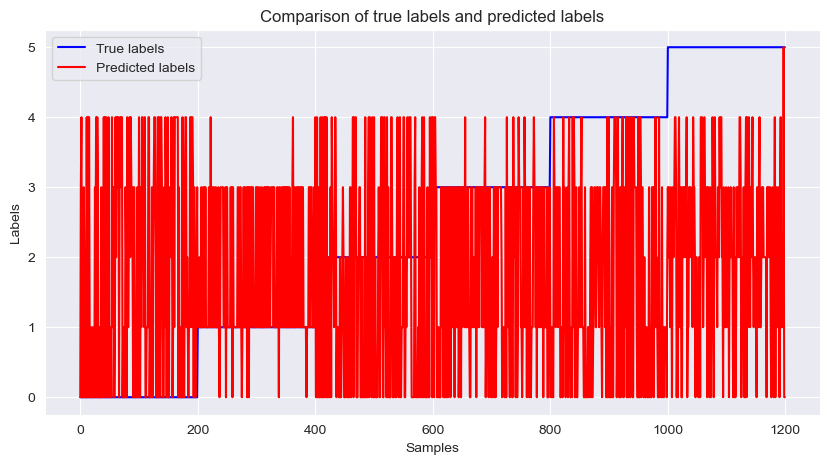

In [158]:
plt.figure(figsize=(10, 5))
plt.plot(y, 'b', label='True labels')
plt.plot(labels_hierarchy, 'r', label='Predicted labels')
plt.title("Comparison of true labels and predicted labels")
plt.xlabel("Samples")
plt.ylabel("Labels")
plt.legend(loc='upper left')
plt.show()

# Comparing results

here we use plots to be able to compare the results easily, the reason for absence of other results for dominant topics data is that it has only one column, for that reason distance related models cant work with a one column dataset, but as you can see, it can work with hierarchy and it even gives us the best results for this specific data

<Figure size 1000x600 with 0 Axes>

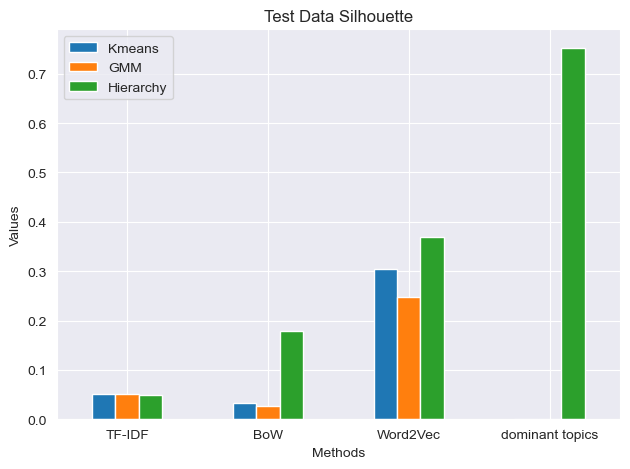

In [141]:
df = pd.read_excel('BCresults.xlsx')

df.set_index('Methods', inplace=True)

plt.figure(figsize=(10, 6))
df.plot(kind='bar', rot=0)
plt.title('Test Data Silhouette')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

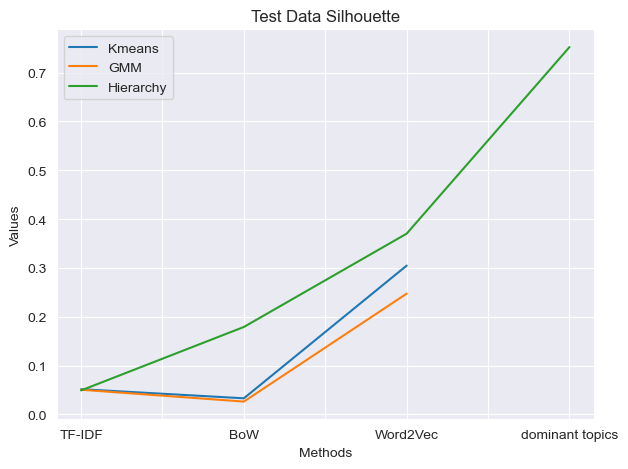

In [142]:
plt.figure(figsize=(10, 6))
df.plot(kind='line', rot=0)
plt.title('Test Data Silhouette')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

we can use a pipeline that extracts the dominant topics from such books and clusters them for a useful model to differentiate between different books or pieces of media